# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions:
• which Genre has The Highest Release?

• Which genres are most popular from year to year?

• Top 10 Director Who Directs Maximum Movies?

• Number of movies from year to year?

• Highest Movie Revenue?

• Max and min Moive Budget?

• Highest average voting vs years?

• How the popularity of each genre change from year to year?

## LoadData
Dataset a CSV file contains the data 



In [1]:
# Import statment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#data shape
df.shape

(10866, 21)

In [4]:
#check of duplicated movies
df['original_title'].duplicated().sum()

295

we have 295 duplicated movie out of 10866 will be removed

In [5]:
df.duplicated(['original_title','genres']).sum()

30

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


the runtime with time = to 0 is not acceptable as will be removed in cleaning data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
mask=df.query('runtime== 0')
mask

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


Observation From The Dataset

we have 295 duplicated movies some of these duplicated data have a runtime of 0 which will clean rather than drop the movie duplicates which will delete random duplicates some have data we need so will remove the movies with 0 runtime 

there are some that movies have revenue and budget of 0 which is not acceptable we will deal with it in cleaning phase

### Data Cleaning

1-removing 0 runtime movies.

2-Remove the unused colums.

3-removing rows with Nan values.

4-removing duplicated movie titles.


#### 1- Removing 0 runtime movies
will start with removing the 0 runtime movies which is the not acceptable data to have 0 runtime

In [9]:
#removing 0 runtime movies
df = df[(df['runtime'] > 0)]

#### 2- Remove the unused colums
homepage , overview , id ...etc these colums have text and does not affect the results 

In [10]:
#removing unnecessary data
df.drop(['id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies','cast'], axis = 1, inplace = True)
df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3- Removing rows with Nan values

In [11]:
df.dropna(axis=0, how='any', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10768 non-null  object 
 1   popularity      10768 non-null  float64
 2   budget          10768 non-null  int64  
 3   revenue         10768 non-null  int64  
 4   original_title  10768 non-null  object 
 5   director        10768 non-null  object 
 6   runtime         10768 non-null  int64  
 7   genres          10768 non-null  object 
 8   release_date    10768 non-null  object 
 9   vote_count      10768 non-null  int64  
 10  vote_average    10768 non-null  float64
 11  release_year    10768 non-null  int64  
 12  budget_adj      10768 non-null  float64
 13  revenue_adj     10768 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


#### 4- Removing duplicated movie titles


In [13]:
#removing duplicated movie title
df['original_title'].drop_duplicates(inplace=True)
df.shape

(10768, 14)

#### check the basic analysis

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10768.000000,1.076800e+04,1.076800e+04,10768.000000,10768.000000,10768.000000,10768.000000,1.076800e+04,1.076800e+04
mean,0.650800,1.475660e+07,4.018473e+07,102.479105,219.195765,5.971712,2001.262723,1.770846e+07,5.183080e+07
std,1.003462,3.102283e+07,1.174731e+08,30.357355,577.918746,0.932788,12.826821,3.442188e+07,1.452061e+08
min,0.000188,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210122,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.386192,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.719025,1.600000e+07,2.477548e+07,112.000000,147.250000,6.600000,2011.000000,2.103337e+07,3.431347e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### view the frist 5 rows after cleaning data

In [15]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### General dataset look

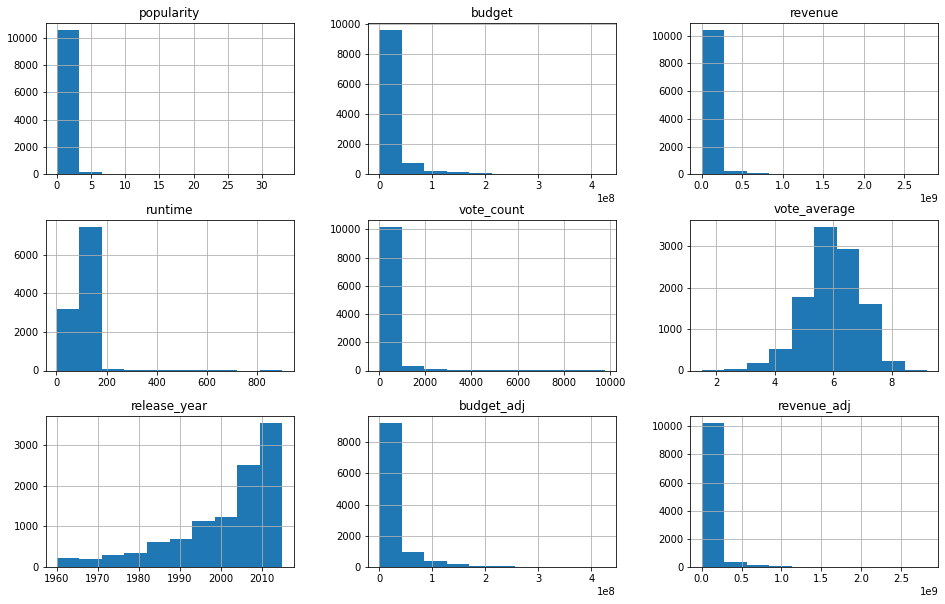

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,10));

## Genre with The Highest Release?

Text(0.5, 1.0, 'Genre with The Highest Release')

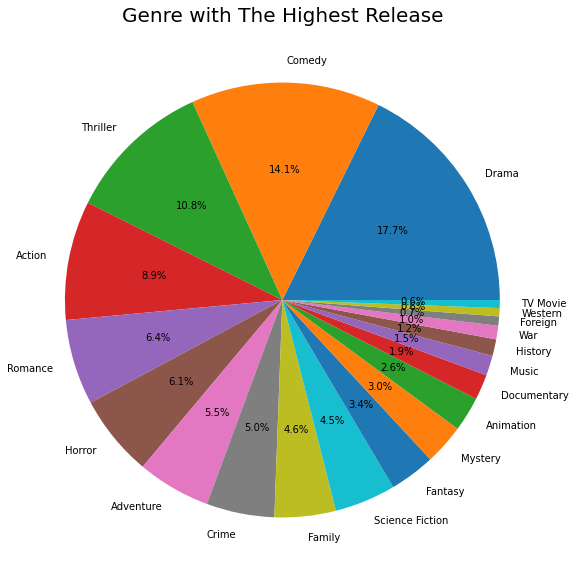

In [17]:
#function to split the string and return the count of genre
def countg(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|')).sort_values()
    z = data.value_counts()
    return z

genre_movies = countg('genres')
genre_movies.plot(kind= 'pie',figsize = (10,10),autopct='%1.1f%%')

plt.ylabel("")
plt.title("Genre with The Highest Release",fontsize=20)

The pie chart shows the percentage of each genre and the most released genre of all data with 17.7% 

## Which genres are most popular from year to year?

In [18]:
#get the std of each movie genre
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
popularity_df = popularity_df.fillna(value = 0.0)

q = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[q]] = popularity_df.loc[split_genre, year[q]] + popularity[q]
    q+=1
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

pop_genre = calculate_std(popularity_df)
pop_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.704728,1.288390,1.940326,1.353124,0.499612,1.075614,0.902690,1.766131,1.490012,1.048948,...,0.558897,0.459516,0.707684,0.935212,0.976987,0.536120,0.684894,0.705061,1.126041,1.553357
Science Fiction,-0.513374,-0.404987,-0.673835,-0.706935,-0.724680,-0.919747,0.040718,-0.675023,1.407358,-0.761441,...,-0.338991,-0.377421,0.030679,0.611565,-0.143126,0.159827,0.141319,0.518571,0.853945,1.189716
Fantasy,-0.574839,-0.785548,-0.725321,-0.958040,-0.066303,-1.043530,-0.648192,-0.746726,-0.112117,-0.822829,...,0.012050,0.259274,-0.043511,0.122719,0.093507,-0.024505,0.032243,-0.234267,-0.155707,-0.387589
Crime,-0.653850,-0.155568,-0.229694,-0.076707,0.029739,-0.573342,-0.091716,0.471195,0.154280,0.543705,...,0.033597,0.259086,0.247910,-0.450141,-0.215670,-0.113589,0.043557,0.300339,-0.266675,-0.017284
Western,0.657211,-0.630132,-0.303397,-0.925499,-1.068229,-0.577726,-0.085793,-0.815661,-0.887981,0.947916,...,-1.089233,-1.083198,-1.117410,-1.173604,-1.032490,-1.050798,-0.919414,-1.024619,-0.972592,-0.806163


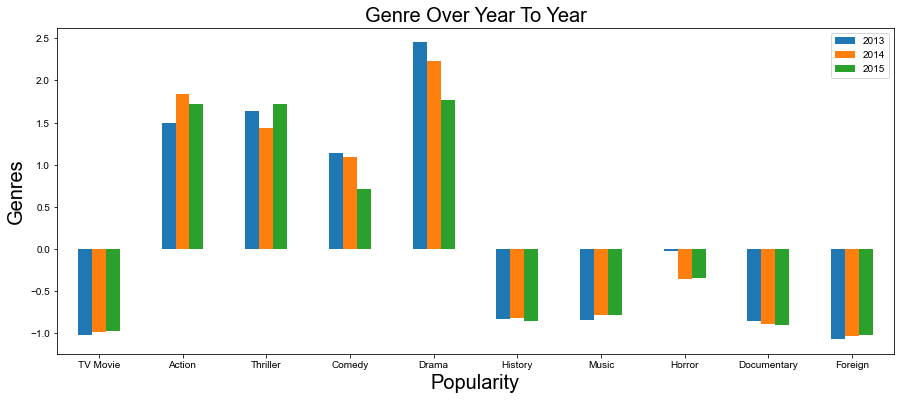

In [19]:
#plot the barh plot of the standardised data.
pop_genre.iloc[10:,53:].plot(kind='bar',figsize = (15,6))

#title and labels of the plot
plt.title("Genre Over Year To Year",fontsize=20)
plt.xlabel("Popularity",fontsize=20)
plt.ylabel("Genres",fontsize = 20)
plt.xticks(rotation=0)
sns.set_style("darkgrid")

We can get the most released genre of each year and get the lowest released genre of each year.

## Top 10 Director Who Directs Maximum Movies?

Text(0, 0.5, 'Movies')

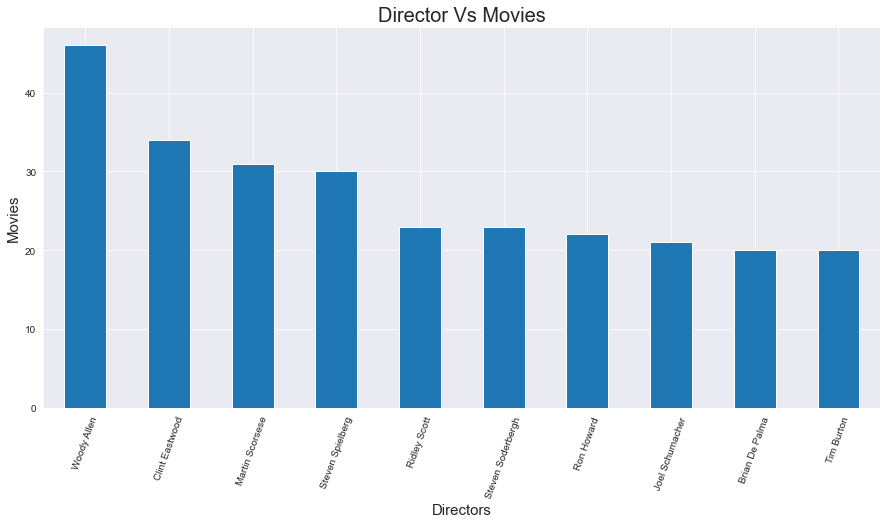

In [20]:
count_director_movies = countg('director')

#plot a barh graph
count_director_movies.iloc[:10].plot(kind='bar',figsize=(15,7))

#setup the title and the labels 
plt.title("Director Vs Movies",fontsize=20)
plt.xlabel("Directors",fontsize=15)

plt.xticks(rotation=70)
plt.ylabel("Movies",fontsize=15)

This bar chart shows the director that has the most number of movies and the top 10 directors.

## Number of movies from year to year

Text(0, 0.5, 'Movies Count')

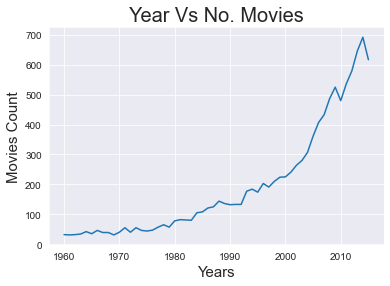

In [21]:
load=df.groupby('release_year').count()['imdb_id']
df.groupby('release_year').count()['imdb_id'].plot();

plt.title('Year Vs No. Movies',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Movies Count',fontsize=15)


Show how the production of movies has changed over the years and get the min and max number of released movies in the year.

## Highest Movie Revenue?

Text(0.5, 0, 'Revenue')

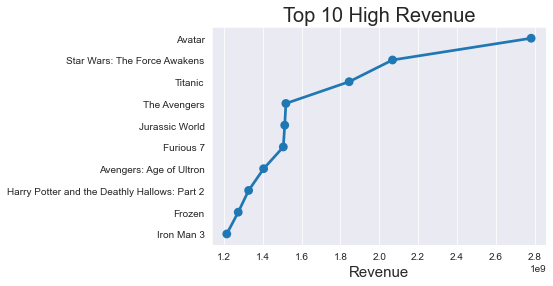

In [22]:
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))


#make the point plot and setup the title and labels.
ss = sns.pointplot(x=list(info['revenue'][:10]),y=list(data[:10]))
ss.set_title("Top 10 High Revenue",fontsize = 20)
ss.set_xlabel("Revenue",fontsize=15)

What movie has the highest revenue and the top 10 highest revenue of one movie.

## Max and min Budget

Text(0.5, 0, 'Budget')

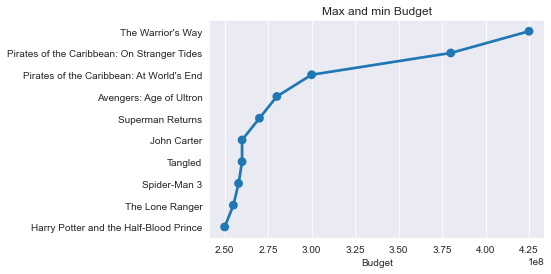

In [23]:
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=list(info['budget'][:10]),y=list(data[:10]))
ax.set_title("Max and min Budget")
ax.set_xlabel("Budget")

Show the max and min budget and how it's not related to the revenue which means the highest budget doesn't mean the highest revenue and is the same as the lowest budget.

## highest average voting vs years?

Text(0, 0.5, 'Vote Count')

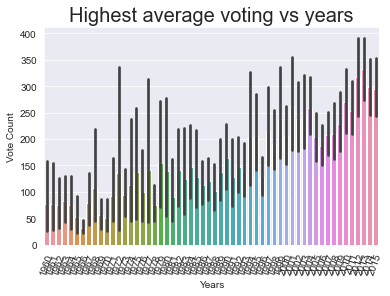

In [24]:
#grouping the years and average votes
df.groupby('release_year')['vote_count'].mean().sort_values(ascending=False)
ms=sns.barplot(x='release_year',y='vote_count',data=df)
#graph labels
plt.xticks(rotation=70)
sns.set(rc={'figure.figsize':(20,10)})
ms.set_title("Highest average voting vs years",fontsize=20)
ms.set_xlabel("Years")
ms.set_ylabel("Vote Count")



How votes change from year to year the min and max number of voters in the same year

## How the popularity of each genre change from year to year?

<AxesSubplot:>

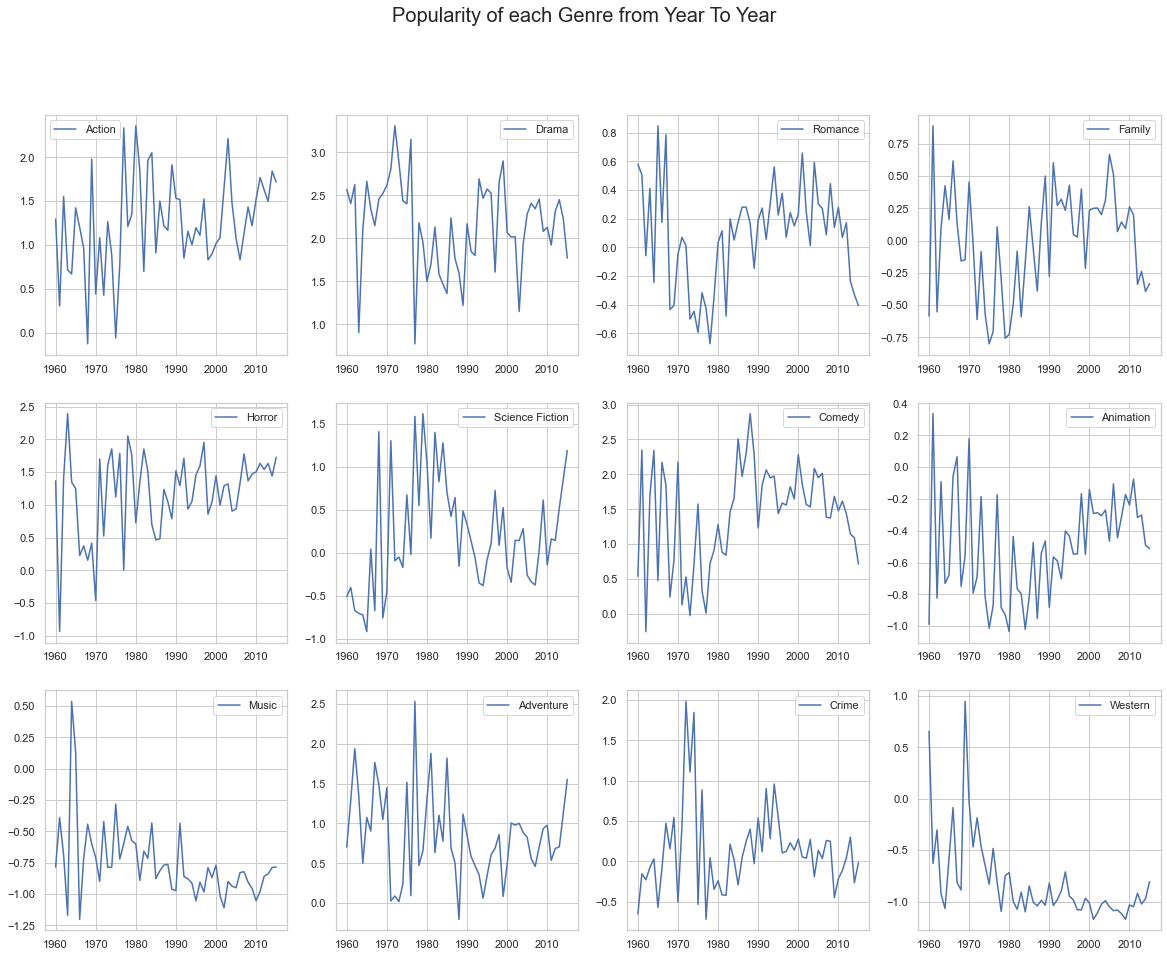

In [25]:
#How the popularity of the genre change year by year
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,4,figsize = (20,15))
fig.suptitle('Popularity of each Genre from Year To Year',fontsize = 20)

pop_genre.loc['Drama'].plot(label = "Drama",x='Years',ax = ax[0][1],legend=True)
pop_genre.loc['Action'].plot(label = "Action",x='Years',ax = ax[0][0],legend=True)
pop_genre.loc['Comedy'].plot(label = "Comedy",x='Years',ax = ax[1][2],legend=True)
pop_genre.loc['Family'].plot(label = "Family",x='Years',ax = ax[0][3],legend=True)
pop_genre.loc['Thriller'].plot(label = "Horror",x='Years',ax = ax[1][0],legend=True)
pop_genre.loc['Western'].plot(label = "Western",x='Years',ax = ax[2][3],legend=True)
pop_genre.loc['Science Fiction'].plot(label = "Science Fiction",x='Years',ax = ax[1][1],legend=True)
pop_genre.loc['Romance'].plot(label = "Romance",x='Years',ax = ax[0][2],legend=True)
pop_genre.loc['Music'].plot(label = "Music",x='Years',ax = ax[2][0],legend=True)
pop_genre.loc['Adventure'].plot(label = "Adventure",x='Years',ax = ax[2][1],legend=True)
pop_genre.loc['Crime'].plot(label = "Crime",x='Years',ax = ax[2][2],legend=True)
pop_genre.loc['Animation'].plot(label = "Animation",x='Years',ax = ax[1][3],legend=True)

This shows how each genre has interest change each year and how each one is affected by the time and can get the year the have the most released movies of one gener

<a id='conclusions'></a>
## Conclusions

The most Release moives after 2010 

The highest avg voting count in 2015

The Most Released Movie genre is Drama the comedy

The highest dirctor made movies is Woody Allen

The highest revenue movie is avatar Then Star wars

The highest movie budget the warrior's Way

The Lowest movie budget Harry Potter and Half-blood Prince

### Limitations

This calculation shows us that we have a high probability of making high revenue if we had similar genres and budgets. This was just one example of a factor that can change the results and there are many others. it depends on the audience's opinion that can change these results so this is no exact solution for this. 

By having a genres saperated by '|' that leads to a high time for calculating the result as i saperated each genres for easier cahlculations 